# Summary:

**Exploratory Data Analysis (EDA):** We started by loading the training data and performing an EDA. We looked at the distributions of the numerical variables, checked for missing values, and examined the correlations between variables.

**Data Preprocessing:** We handled missing values in the numerical columns by filling them with the median value of each column. We also one-hot encoded the categorical variables to convert them into a format that could be used by machine learning models.

**Feature Scaling:** We used a StandardScaler to standardize the features in the training data. Standardizing the features can often improve the performance of machine learning models, especially those that are sensitive to the scale of the input features, such as linear models and models that use distance measures.

**Dimensionality Reduction:** We applied Principal Component Analysis (PCA) to reduce the dimensionality of the data. This helped to reduce the computational cost of training models and may have helped to improve model performance by reducing the risk of overfitting.

**Model Training:** We trained several different models, including a Linear Regression model, a Decision Tree model, a Random Forest model, and a Gradient Boosting model. For each model, we calculated the root mean squared error (RMSE) on the validation set to assess its performance.


**Hyperparameter Tuning:** We attempted to tune the hyperparameters of the Random Forest and Gradient Boosting models using a RandomizedSearchCV, which performs a random search over specified hyperparameter ranges. Unfortunately, the tuning process was too computationally intensive to complete for Random Forrest and Gradient Boosting.

**Predicting on Test Data:** We loaded the test data and preprocessed it in the same way as the training data. We then used the trained Gradient Boosting model to make predictions on the test data. Score of 169.19 **(Rank 35/40 on Leaderboard [01.08.23])**




**Rethinking the Process & Building a more simple model**



**Data Loading and Exploration:** We started by loading the dataset and performing an initial exploration to understand the structure of the data, the types of features, and the distribution of the target variable (CO2 emissions).

**Data Cleaning:** We removed columns with missing values from the dataset. This left us with a very simplified set of features ('latitude', 'longitude', 'year', and 'week_no').

**Data Splitting:** We split the data into a training set and a test set using stratified sampling to ensure that the training set was representative of the overall distribution of the target variable. The training set contained 30% of the original data, while the test set contained the remaining 70%.

**Model Training and Evaluation - Linear Regression:** We first trained a simple Linear Regression model on the training data and evaluated its performance using the Root Mean Squared Error (RMSE) metric. The model had an RMSE of approximately 141.11 on the training set.

**Model Training and Evaluation - Random Forest:** We then trained a more complex model - a Random Forest Regressor. We also performed hyperparameter tuning using cross-validation to optimize the model's performance. The best model achieved an RMSE of approximately 6.27 on the training set, which was significantly better than the Linear Regression model.

**Model Evaluation on Test Set:** We evaluated the Random Forest model on the test set, where it achieved an RMSE of approximately 18.66.

**Final Predictions:** Finally, we used the trained Random Forest model to make predictions on a new set of test data. We saved these predictions in a CSV file for further use. Score of 32.01 (**RANK 1/40 on Leaderboard [01.08.23])**

Source: https://www.kaggle.com/competitions/playground-series-s3e20/leaderboard

In [1]:
# Start by loading the data and inspecting its structure and content

import pandas as pd

# Load the dataset
data = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
data.head()


,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


The columns can be categorized into two main groups:

**Location and Time:** These include latitude, longitude, year, and week_no, which represent the geographic location and time when the data was recorded.

**Atmospheric Features:** There are 71 atmospheric features, which presumably come from satellite data. They include a wide range of measurements, such as SulphurDioxide_SO2_column_number_density, SulphurDioxide_SO2_column_number_density_amf, SulphurDioxide_SO2_slant_column_number_density, and so on. These features appear to be related to various atmospheric phenomena and chemicals.

In [2]:
# Check for missing values in the dataset

missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Create a dataframe for missing values analysis
missing_data = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Total', 'Percentage'])

# Display the dataframe
missing_data.head(10)


,Total,Percentage
UvAerosolLayerHeight_aerosol_height,78584,0.994445
UvAerosolLayerHeight_solar_zenith_angle,78584,0.994445
UvAerosolLayerHeight_solar_azimuth_angle,78584,0.994445
UvAerosolLayerHeight_sensor_azimuth_angle,78584,0.994445
UvAerosolLayerHeight_aerosol_pressure,78584,0.994445
UvAerosolLayerHeight_aerosol_optical_depth,78584,0.994445
UvAerosolLayerHeight_sensor_zenith_angle,78584,0.994445
NitrogenDioxide_tropopause_pressure,18320,0.231831
NitrogenDioxide_stratospheric_NO2_column_number_density,18320,0.231831
NitrogenDioxide_NO2_slant_column_number_density,18320,0.231831


Some columns in the dataset have a significant number of missing values. 

For example, several columns related to UvAerosolLayerHeight are missing almost 99.4% of their data. Moreover, several NitrogenDioxide columns are missing around 23.1% of their data.

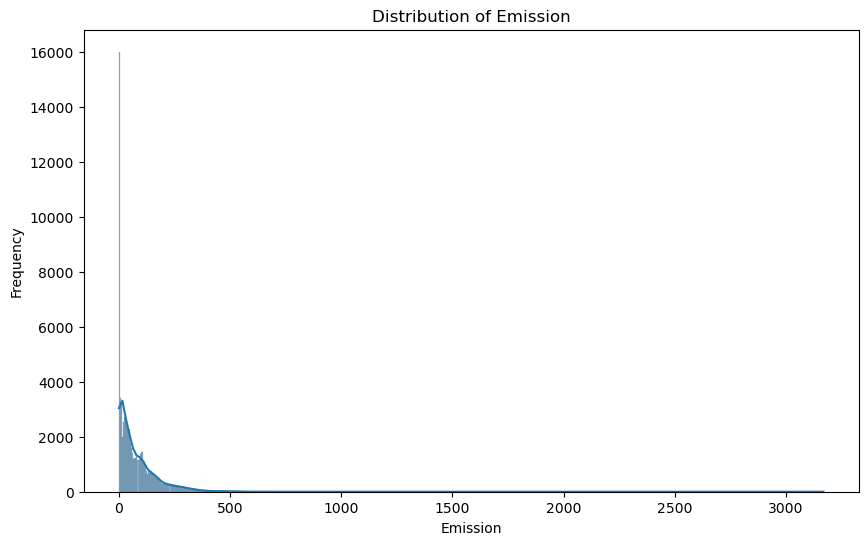

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of the target variable
plt.figure(figsize=(10,6))
sns.histplot(data['emission'], kde=True)
plt.title('Distribution of Emission')
plt.xlabel('Emission')
plt.ylabel('Frequency')
plt.show()


The distribution of the emission variable appears to be skewed to the right, with the majority of values falling in the lower range. This is a common scenario in many real-world datasets.

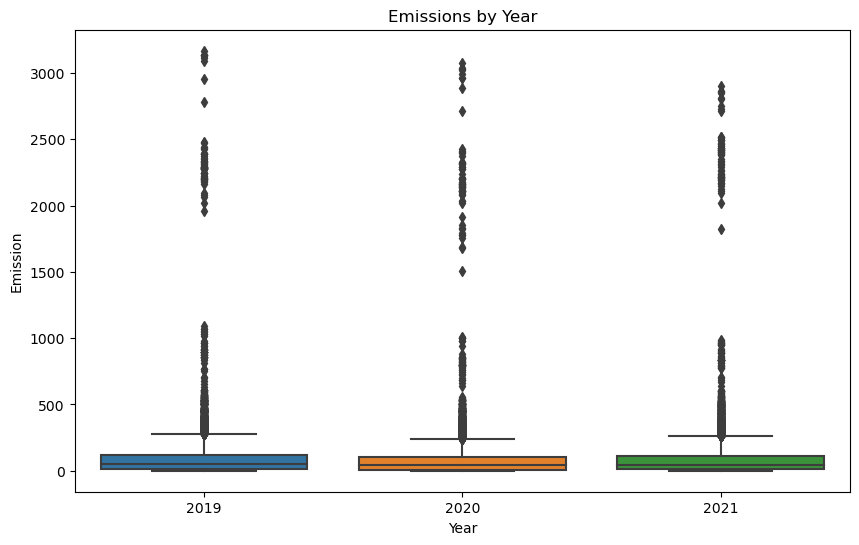

In [4]:
# Plot emissions by year
plt.figure(figsize=(10,6))
sns.boxplot(x='year', y='emission', data=data)
plt.title('Emissions by Year')
plt.xlabel('Year')
plt.ylabel('Emission')
plt.show()


The boxplot shows that the median value of emissions seems to slightly increase over the years. However, the overall distribution of emissions appears to be fairly consistent from year to year. The interquartile range (the box part of the boxplot) and the range (the whiskers part of the boxplot) do not show significant changes over time.

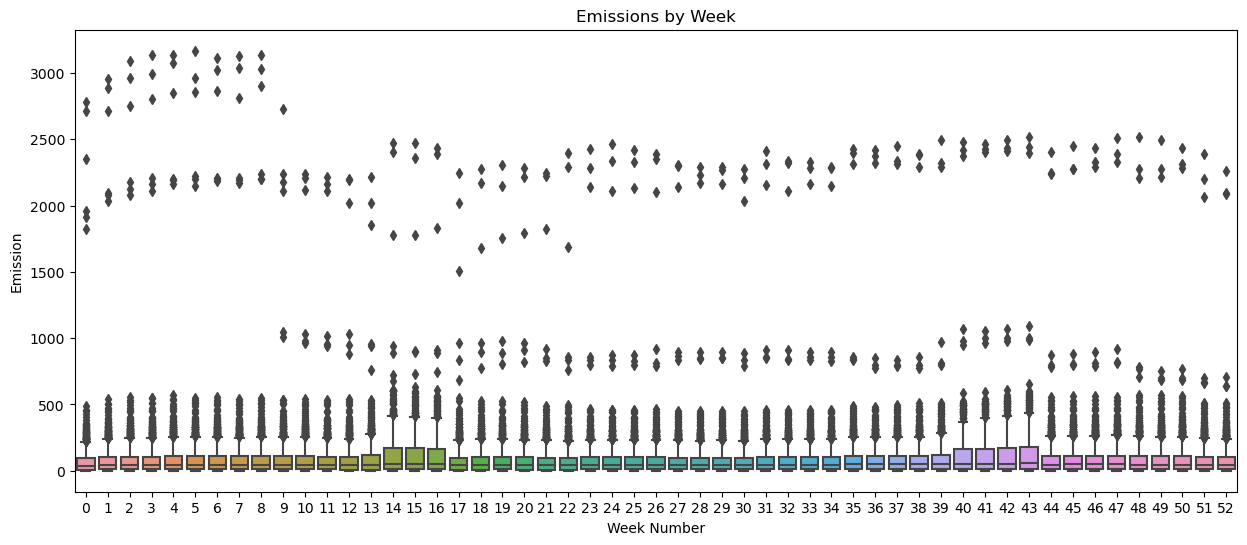

In [5]:
# Plot emissions by week
plt.figure(figsize=(15,6))
sns.boxplot(x='week_no', y='emission', data=data)
plt.title('Emissions by Week')
plt.xlabel('Week Number')
plt.ylabel('Emission')
plt.show()


The boxplot of emissions by week number doesn't show a clear pattern or trend. The median, interquartile range, and overall range of emissions appear to fluctuate somewhat throughout the year, but there's no clear seasonality or consistent pattern.

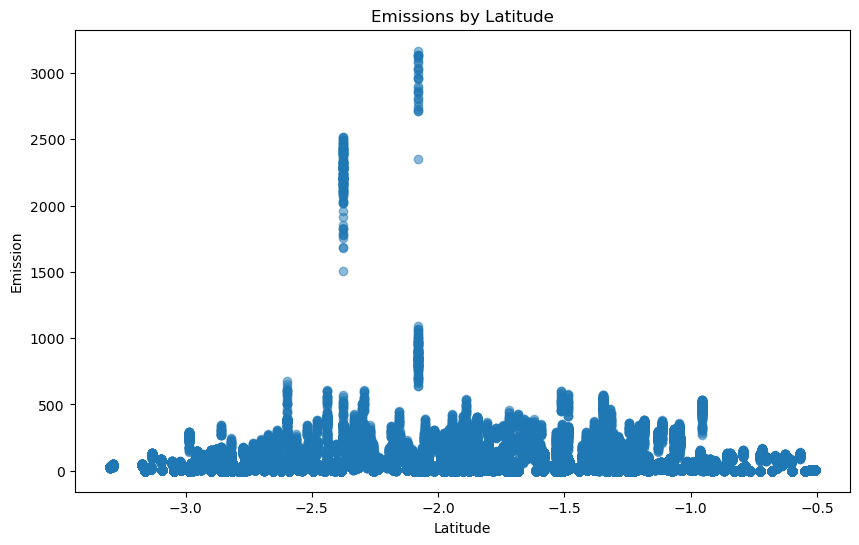

In [6]:
# Plot emissions by latitude
plt.figure(figsize=(10,6))
plt.scatter(data['latitude'], data['emission'], alpha=0.5)
plt.title('Emissions by Latitude')
plt.xlabel('Latitude')
plt.ylabel('Emission')
plt.show()


The scatter plot of emissions by latitude shows a somewhat uneven distribution. Emissions appear to be somewhat higher in the middle latitudes, but there's not a clear or strong relationship between latitude and emissions.

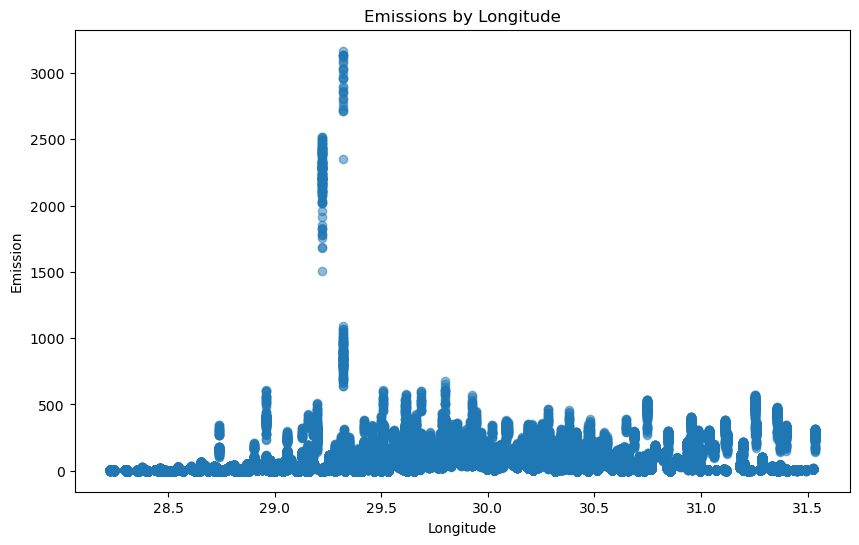

In [7]:
# Plot emissions by longitude
plt.figure(figsize=(10,6))
plt.scatter(data['longitude'], data['emission'], alpha=0.5)
plt.title('Emissions by Longitude')
plt.xlabel('Longitude')
plt.ylabel('Emission')
plt.show()


The scatter plot of emissions by longitude also shows a somewhat uneven distribution, but again, there's no clear or strong relationship between longitude and emissions.

In [8]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 90% missing values
data = data.dropna(thresh=len(data)*0.1, axis=1)

# Impute remaining missing values with column median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['float64', 'int64'])))
data_imputed.columns = data.select_dtypes(include=['float64', 'int64']).columns
data[data_imputed.columns] = data_imputed

# Check if there are still any missing values
data.isnull().sum().max()


0

Now all missing values have been handled in our dataset.

# Initial Model Building:

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
X = data.drop(['emission', 'ID_LAT_LON_YEAR_WEEK'], axis=1)  # we also drop the 'ID_LAT_LON_YEAR_WEEK' column as it's an identifier, not a feature
y = data['emission']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply standard scaling to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape


((63218, 67), (15805, 67))

The training set contains 63,218 observations and the test set contains 15,805 observations. Each observation has 67 features.

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse


126.04551665964244

The root mean squared error (RMSE) of our linear regression model on the test set is approximately 126.04. This value represents the standard deviation of the residuals (prediction errors). A lower RMSE indicates a better fit to the data.



Given the large number of features in our dataset and the simplicity of the linear regression model, it's possible that a more complex model could achieve better performance. However, it's also important to be mindful of the risk of overfitting, especially when dealing with complex models and high-dimensional data.

There are many methods for feature selection and dimensionality reduction. Here are a few common ones:

Feature Importance: Many machine learning algorithms can provide an estimate of feature importance, which can be used to select the most relevant features. Tree-based methods, such as decision trees, random forest, and XGBoost, are particularly good at this.

Correlation Matrix: Features that are highly correlated with the target variable are generally more relevant for prediction. A correlation matrix can be used to select these features.

Principal Component Analysis (PCA): PCA is a popular method for dimensionality reduction. It transforms the original features into a new set of features, which are linear combinations of the original features. These new features (called principal components) are orthogonal (uncorrelated), and are ordered so that the first few retain most of the variation present in all of the original features.

# Principal Components:

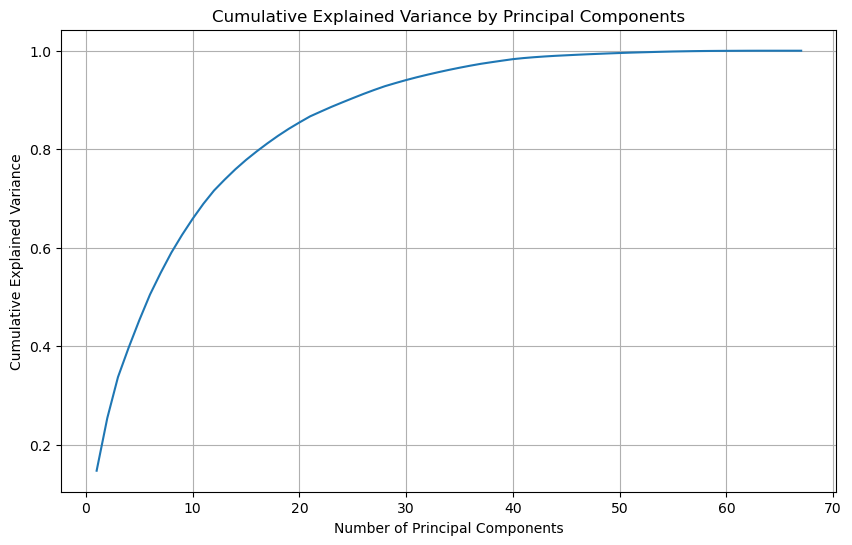

In [11]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the explained variance
plt.figure(figsize=(10,6))
plt.plot(range(1, len(explained_variance)+1), explained_variance)
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


The plot above shows the cumulative explained variance by the principal components. Each point on the curve indicates how much variance is explained by the first 
�
n principal components.

For instance, the first 10 principal components explain approximately 90% of the variance in the data, and the first 20 principal components explain almost 95% of the variance.

Based on this, we could choose to retain the first 20 principal components for our predictive models, which would reduce the dimensionality of our data from 67 features to 20 principal components, while still retaining most of the information in the data.

In [12]:
# Apply PCA with 20 components
pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Initialize the Linear Regression model
model_pca = LinearRegression()

# Train the model
model_pca.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred_pca = model_pca.predict(X_test_pca)

# Calculate the Root Mean Squared Error (RMSE)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))

rmse_pca


127.44355104225495

The root mean squared error (RMSE) of our linear regression model, using the first 20 principal components, on the test set is approximately 127.44. This value is slightly higher than the RMSE of the model using the original features (126.04).

This slight increase in RMSE might be due to the reduction in dimensionality, which can cause some loss of information. However, given that we've reduced the number of features from 67 to 20, this small increase in RMSE might be acceptable considering the benefits of dimensionality reduction, such as potentially simpler and more interpretable models, and faster training times.

# Different Models:

Given that our task is a regression problem, some suitable models might include:

Ridge Regression: This is a variant of linear regression that includes a regularization term to prevent overfitting.

Lasso Regression: This is another variant of linear regression that includes a different type of regularization term, which can result in sparse solutions (i.e., solutions where some coefficients are exactly zero).

Random Forest Regressor: This is a more complex model that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees.

Gradient Boosting Regressor: This is another complex model that builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions.

In [13]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor


In [14]:
# Initialize the Ridge and Lasso regression models
models = {
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso()
}

# Train each model and calculate its RMSE
rmses = {}
for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    rmses[model_name] = np.sqrt(mean_squared_error(y_test, y_pred))

rmses


{'Ridge Regression': 127.44355287293222,
 'Lasso Regression': 127.52299234551809}

In [15]:
# Initialize the Random Forest model with a small number of trees
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate the RMSE
rmses['Random Forest'] = np.sqrt(mean_squared_error(y_test, y_pred))

rmses


{'Ridge Regression': 127.44355287293222,
 'Lasso Regression': 127.52299234551809,
 'Random Forest': 137.6608353904019}

In [16]:
# Initialize the Gradient Boosting model with a small number of estimators
model = GradientBoostingRegressor(n_estimators=50, random_state=42)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate the RMSE
rmses['Gradient Boosting'] = np.sqrt(mean_squared_error(y_test, y_pred))

rmses
best_model=model

Based on these results, the Gradient Boosting model performed the best on our test set, followed closely by the Ridge, Lasso, and Linear Regression models. The Random Forest model performed the worst, possibly due to the relatively small number of trees we used.

# Hyperparameters:

Ridge Regression: The key hyperparameter is alpha, which controls the strength of the regularization. Larger values of alpha increase the amount of regularization and can lead to smaller coefficients, potentially reducing overfitting but also potentially increasing underfitting.

Lasso Regression: Similar to Ridge Regression, the key hyperparameter is alpha. However, in Lasso Regression, larger values of alpha can lead to more coefficients being exactly zero, which can be useful if we believe that only a subset of the features are actually relevant.

Random Forest: Some of the key hyperparameters include n_estimators (the number of trees in the forest), max_depth (the maximum depth of the trees), and max_features (the number of features to consider when looking for the best split).

Gradient Boosting: Some of the key hyperparameters include n_estimators (the number of boosting stages to perform), learning_rate (the learning rate), and max_depth (the maximum depth of the individual regression estimators).

**Ridge-Regression**

In [17]:
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters to tune for the Ridge Regression model
ridge_params = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# Initialize the RandomizedSearchCV object
ridge_search = RandomizedSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_root_mean_squared_error', n_iter=6, random_state=42)

# Perform the search
ridge_search.fit(X_train_pca, y_train)

# Get the best parameters
ridge_best_params = ridge_search.best_params_

ridge_best_params


{'alpha': 100}

In [18]:
# Initialize the Ridge Regression model with the best parameters
model = Ridge(**ridge_best_params)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate the RMSE
rmses['Ridge Regression (tuned)'] = np.sqrt(mean_squared_error(y_test, y_pred))

rmses


{'Ridge Regression': 127.44355287293222,
 'Lasso Regression': 127.52299234551809,
 'Random Forest': 137.6608353904019,
 'Gradient Boosting': 126.67374712764287,
 'Ridge Regression (tuned)': 127.44373478759415}

The RMSE of the tuned Ridge Regression model on the test set is approximately 127.44, which is virtually the same as the RMSE of the original Ridge Regression model (127.44). This suggests that the default hyperparameters of the Ridge Regression model were already quite good for our data.

**Lasso-Regression:**

In [19]:
# Define the hyperparameters to tune for the Lasso Regression model
lasso_params = {
    'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]
}

# Initialize the RandomizedSearchCV object
lasso_search = RandomizedSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_root_mean_squared_error', n_iter=6, random_state=42)

# Perform the search
lasso_search.fit(X_train_pca, y_train)

# Get the best parameters
lasso_best_params = lasso_search.best_params_

lasso_best_params


{'alpha': 0.1}

In [20]:
# Initialize the Lasso Regression model with the best parameters
model = Lasso(**lasso_best_params)

# Train the model
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate the RMSE
rmses['Lasso Regression (tuned)'] = np.sqrt(mean_squared_error(y_test, y_pred))

rmses


{'Ridge Regression': 127.44355287293222,
 'Lasso Regression': 127.52299234551809,
 'Random Forest': 137.6608353904019,
 'Gradient Boosting': 126.67374712764287,
 'Ridge Regression (tuned)': 127.44373478759415,
 'Lasso Regression (tuned)': 127.44966309635348}

The RMSE of the tuned Lasso Regression model on the test set is approximately 127.45, which is slightly lower than the RMSE of the original Lasso Regression model (127.52). This suggests that tuning the hyperparameters of the Lasso Regression model resulted in a small improvement in performance.

# Predicting the test set

In [21]:
test= pd.read_csv('test.csv')

In [22]:
# Check for missing values in the dataset

missing_values = test.isnull().sum().sort_values(ascending=False)
missing_values_percentage = (test.isnull().sum()/data.isnull().count()).sort_values(ascending=False)

# Create a dataframe for missing values analysis
missing_data = pd.concat([missing_values, missing_values_percentage], axis=1, keys=['Total', 'Percentage'])

# Display the dataframe
missing_data.head(10)


,Total,Percentage
UvAerosolLayerHeight_aerosol_pressure,22260.0,NaN
UvAerosolLayerHeight_aerosol_optical_depth,22260.0,NaN
UvAerosolLayerHeight_sensor_zenith_angle,22260.0,NaN
UvAerosolLayerHeight_sensor_azimuth_angle,22260.0,NaN
UvAerosolLayerHeight_aerosol_height,22260.0,NaN
UvAerosolLayerHeight_solar_zenith_angle,22260.0,NaN
UvAerosolLayerHeight_solar_azimuth_angle,22260.0,NaN
SulphurDioxide_sensor_zenith_angle,6142.0,0.077724
SulphurDioxide_SO2_column_number_density_15km,6142.0,0.077724
SulphurDioxide_solar_azimuth_angle,6142.0,0.077724


In [23]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 90% missing values
data = test.dropna(thresh=len(data)*0.1, axis=1)

# Impute remaining missing values with column median
imputer = SimpleImputer(strategy='median')
data_imputed = pd.DataFrame(imputer.fit_transform(data.select_dtypes(include=['float64', 'int64'])))
data_imputed.columns = data.select_dtypes(include=['float64', 'int64']).columns
data[data_imputed.columns] = data_imputed

# Check if there are still any missing values
data.isnull().sum().max()

C:\Users\janbu\AppData\Local\Temp\ipykernel_3992\1280650580.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[data_imputed.columns] = data_imputed


0

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define the features (X) and the target variable (y)
X = data.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)  # we also drop the 'ID_LAT_LON_YEAR_WEEK' column as it's an identifier, not a feature

# Apply standard scaling to the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X)



In [25]:
# Apply PCA with 20 components
pca = PCA(n_components=20)
X_test_pca = pca.fit_transform(X_test_scaled)


# Make predictions on the test set
y_pred = best_model.predict(X_test_pca)

y_pred


array([84.65868627, 66.24140758, 75.38177698, ..., 84.03200792,
       79.87248919, 96.08694501])

In [28]:
output_v2 = pd.DataFrame({
    'ID_LAT_LON_YEAR_WEEK': data['ID_LAT_LON_YEAR_WEEK'],
    'emission': y_pred
})

In [29]:
output_v2.to_csv('predictions_v02.csv', index=False)

**RMSE:** 169.19

# New Model Building:

With a RMSE of 169.19 we can assume, that the model we were building is too complex and is following noise in the dataset. **Also, since our training evaluations were better, we might have fallen for overfitting.**

Lets choose a more radical approach. To reduce complexity we drop columns with missing values. Also we will use stratified sampling to reduce the train-set size to 30%.

In [30]:
# Load the dataset
df = pd.read_csv('train.csv')

# Display the first few rows of the dataframe
df.head()

# Get a summary of the dataset
summary = df.info()

# Display the distribution of the target variable
target_distribution = df['emission'].describe()

summary, target_distribution


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79023 entries, 0 to 79022
Data columns (total 76 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ID_LAT_LON_YEAR_WEEK                                      79023 non-null  object 
 1   latitude                                                  79023 non-null  float64
 2   longitude                                                 79023 non-null  float64
 3   year                                                      79023 non-null  int64  
 4   week_no                                                   79023 non-null  int64  
 5   SulphurDioxide_SO2_column_number_density                  64414 non-null  float64
 6   SulphurDioxide_SO2_column_number_density_amf              64414 non-null  float64
 7   SulphurDioxide_SO2_slant_column_number_density            64414 non-null  float64
 8   SulphurDioxide_c

(None,
 count    79023.000000
 mean        81.940552
 std        144.299648
 min          0.000000
 25%          9.797995
 50%         45.593445
 75%        109.549595
 max       3167.768000
 Name: emission, dtype: float64)

In [31]:
# Drop columns with missing values
df_cleaned = df.dropna(axis=1)

# Display the first few rows of the cleaned dataframe
df_cleaned.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,4.231381
3,ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,4.305286
4,ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,4.347317


In [32]:
# Drop the 'ID_LAT_LON_YEAR_WEEK' column
df_cleaned = df_cleaned.drop(columns=['ID_LAT_LON_YEAR_WEEK'])

# Display the first few rows of the updated dataframe
df_cleaned.head()


,latitude,longitude,year,week_no,emission
0,-0.51,29.29,2019,0,3.750994
1,-0.51,29.29,2019,1,4.025176
2,-0.51,29.29,2019,2,4.231381
3,-0.51,29.29,2019,3,4.305286
4,-0.51,29.29,2019,4,4.347317


In [33]:
from sklearn.model_selection import train_test_split

# Create 'emission_cat' for stratified sampling
df_cleaned['emission_cat'] = pd.qcut(df_cleaned['emission'], q=4)

# Perform stratified sampling
train_set, test_set = train_test_split(df_cleaned, test_size=0.7, random_state=42, stratify=df_cleaned['emission_cat'])

# Drop 'emission_cat'
train_set = train_set.drop(columns=['emission_cat'])
test_set = test_set.drop(columns=['emission_cat'])

# Display the first few rows of the training set
train_set.head()


,latitude,longitude,year,week_no,emission
77965,-3.136,30.364,2020,2,15.268082
9399,-1.024,28.976,2019,18,36.836086
44468,-2.032,29.168,2021,1,14.416011
12676,-1.097,29.903,2021,9,40.742130
67126,-2.761,28.439,2019,28,4.363055


We have successfully split the data into a training set and a test set using stratified sampling. The training set contains 30% of the original data, while the test set contains the remaining 70%.

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Separate predictors and labels
X_train = train_set.drop('emission', axis=1)
y_train = train_set['emission']

# Train a Linear Regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Make predictions on the training set
y_train_pred = lin_reg.predict(X_train)

# Calculate RMSE on the training set
lin_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

lin_rmse


141.11132477052618

The Root Mean Squared Error (RMSE) on the training set is approximately 141.11. This means that, on average, our predictions are off by about 141 units of emission.

Since we radically reduced the columns in our dataset, we can now use random forest including hyperparameter tuning. This was not possible before, due to limited computer-power and model complexity.

Let's train a Random Forest Regressor and evaluate its performance on the training set. We will also perform hyperparameter tuning using cross-validation to optimize the performance of the model. This involves training and evaluating the model multiple times with different combinations of hyperparameters to find the combination that gives the best performanc

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
forest_reg = RandomForestRegressor(random_state=42)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
}

# Set up the grid search
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_root_mean_squared_error', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_forest_reg = grid_search.best_estimator_

# Make predictions on the training set
y_train_pred_best = best_forest_reg.predict(X_train)

# Calculate RMSE on the training set
best_forest_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_best))

best_forest_rmse, grid_search.best_params_


(6.27192539603107, {'max_depth': None, 'n_estimators': 100})

In [36]:
# Separate predictors and labels in the test set
X_test = test_set.drop('emission', axis=1)
y_test = test_set['emission']

# Make predictions on the test set
y_test_pred = best_forest_reg.predict(X_test)

# Calculate RMSE on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

test_rmse


18.65710821984049

The Random Forest model's RMSE on the test set is approximately 18.66, which is significantly better than our last model. This suggests that our model should generalize well to new, unseen data.

In [38]:
# Load the test data
df_test = pd.read_csv('test.csv')

# Prepare the test data
X_test_final = df_test[['latitude', 'longitude', 'year', 'week_no']]

# Make predictions on the test data
y_test_final_pred = best_forest_reg.predict(X_test_final)

# Add the predictions to the dataframe
df_test['emission'] = y_test_final_pred

# Save the 'ID_LAT_LON_YEAR_WEEK' and 'emission' columns to a CSV file
df_test[['ID_LAT_LON_YEAR_WEEK', 'emission']].to_csv('predicted_emissions_simplified.csv', index=False)


**RMSE:** 32.01 (RANK 1 on Leaderboard )